In [2]:
import pandas as pd
import numpy as np
import matplotlib  as plt
import seaborn as sns
from sklearn import tree

In [3]:
df = pd.read_csv("Iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 6)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [8]:
X=df
y=df["Species"]

In [9]:
feature= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[feature] # Features
y = df.Species # Target variable

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [12]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

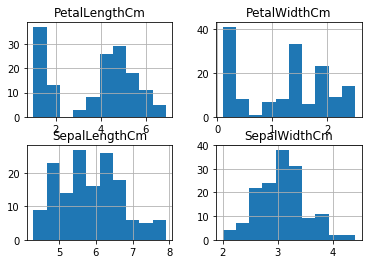

In [13]:
viz = df[['SepalLengthCm','SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
viz.hist()
plt

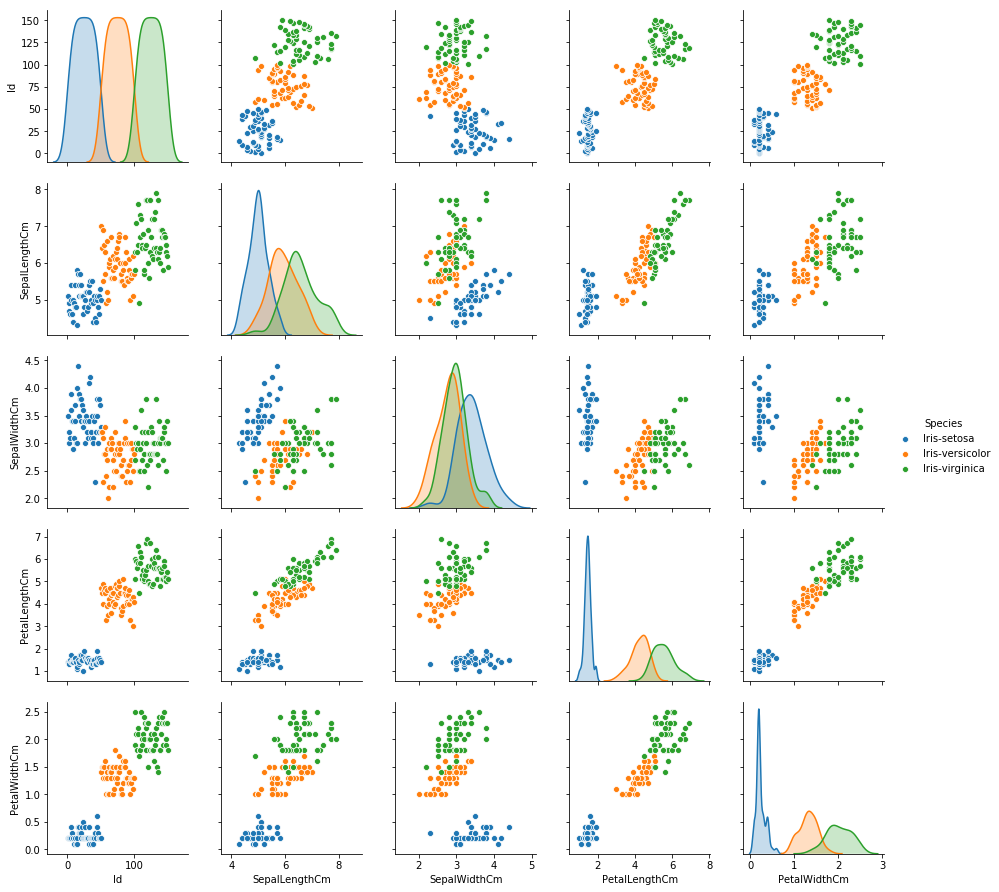

In [17]:
sns.pairplot(df, hue = 'Species')

<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

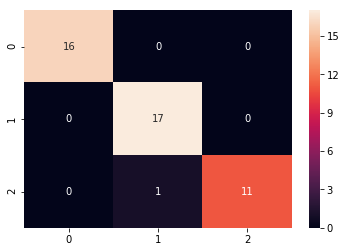

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt

In [19]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



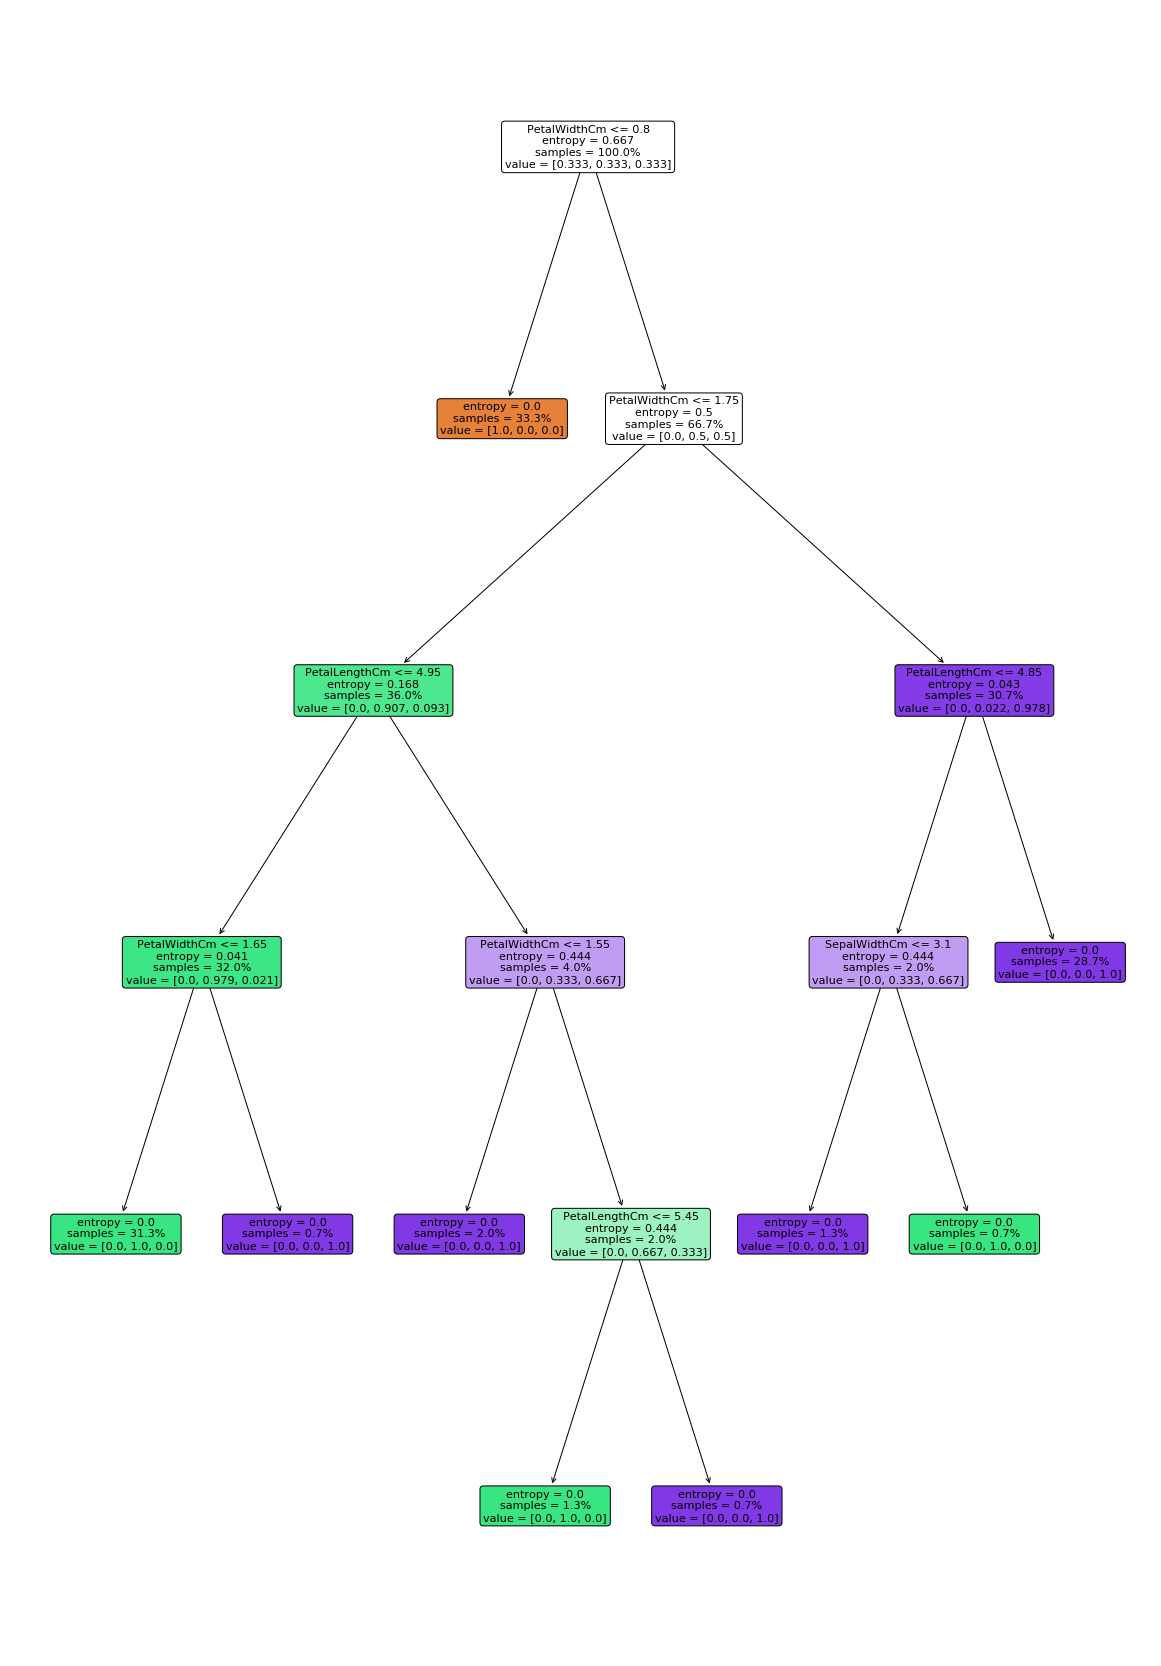

In [20]:
# Vizualizing Decision Trees
import matplotlib.pyplot as plt
from sklearn.tree import *
plt.figure(figsize=(20,30))
tree.plot_tree(clf.fit(X,y),feature_names=feature,filled=True,precision=3,proportion=True,rounded=True)
plt.show()